Given a bank customer, build a neural network-based classifier that can determine whether 
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data. 
4. Initialize and build the model. Identify the points of improvement and implement the same. 
5. Print the accuracy score and confusion matrix (5 points).

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x=data[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=data['Exited']

In [5]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [8]:
x_std=std.fit_transform(x)

In [9]:
x_std

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.25,random_state=0)

In [11]:
x_std.shape

(10000, 8)

In [12]:
x_train.shape

(7500, 8)

In [13]:
y_train.shape

(7500,)

In [14]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,activation='relu')

In [15]:
ann.fit(x_train,y_train)

/Users/suyashjoshi/Git Workspace/LP-III/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)

In [16]:
y_pred=ann.predict(x_test)

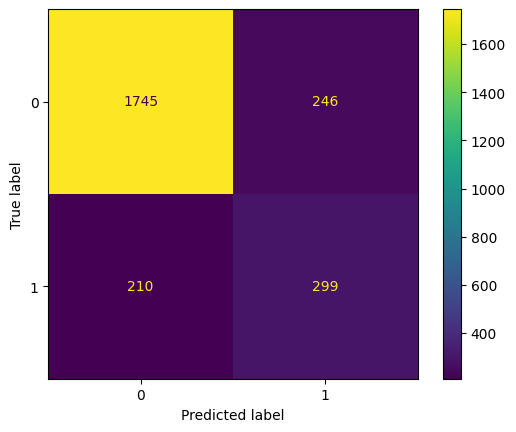

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1991
           1       0.55      0.59      0.57       509

    accuracy                           0.82      2500
   macro avg       0.72      0.73      0.73      2500
weighted avg       0.82      0.82      0.82      2500



### Oversampling the dataset to improve the recall

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros=RandomOverSampler(random_state=0)
x_res,y_res=ros.fit_resample(x,y)

In [21]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [22]:
x_std=std.fit_transform(x_res)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y_res)

In [24]:
x_train.shape

(11944, 8)

In [25]:
x_test.shape

(3982, 8)

In [26]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')

In [27]:
ann.fit(x_train,y_train)

/Users/suyashjoshi/Git Workspace/LP-III/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [28]:
ann.score(x_test,y_test)

0.8470617780010046

In [29]:
y_pred=ann.predict(x_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1977
           1       0.86      0.83      0.85      2005

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982



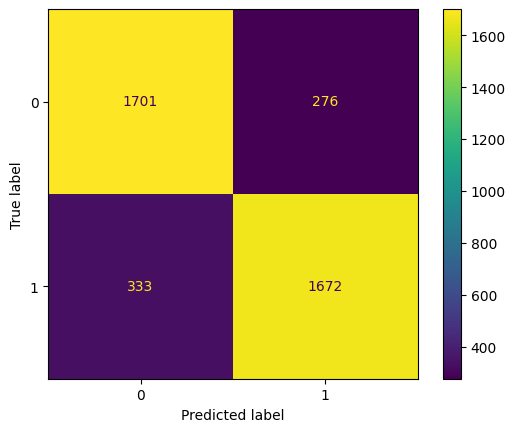

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)